#Costo del Seguro Médico con Regresión Lineal

Muchos factores que afectan cuánto pagas por el seguro de salud no están bajo tu control. Sin embargo, es bueno tener una comprensión de cuáles son. Aquí hay algunos factores que afectan cuánto cuestan las primas del seguro de salud:

*   Edad: Edad del beneficiario principal
*   Sexo: Género del contratante del seguro, femenino, masculino
* Índice de masa corporal (IMC): Proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre altura y peso, idealmente entre 18.5 y 24.9.
*   Niños: Número de niños cubiertos por el seguro de salud / Número de dependientes

*   Fumador: Si es fumador
*   Región: Área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste



##EDA y visualización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No tenemos valores faltantes.Ahora hagamos un análisis exploratorio de datos (EDA) con algunos gráficos interesantes. Primero veremos cómo se distribuyen los costos según los factores proporcionados.

Text(0.5, 1.0, 'Distribution of Charges')

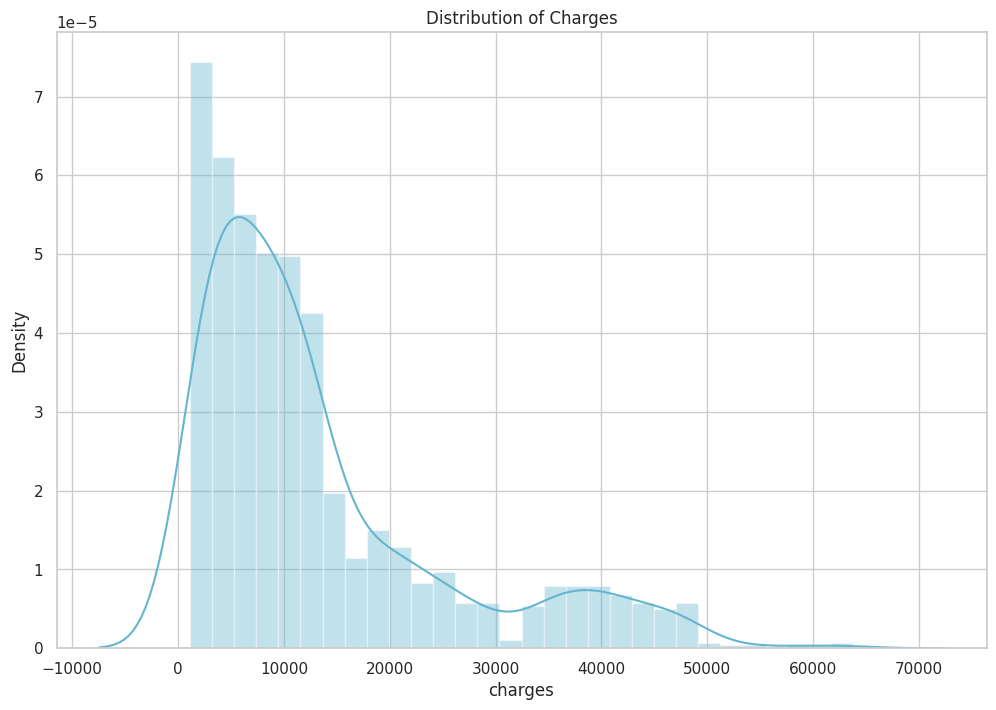

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

In [ ]:
Esta distribución tiene una asimetría hacia la derecha. Para acercarla a una distribución normal, podemos aplicar el logaritmo natural.

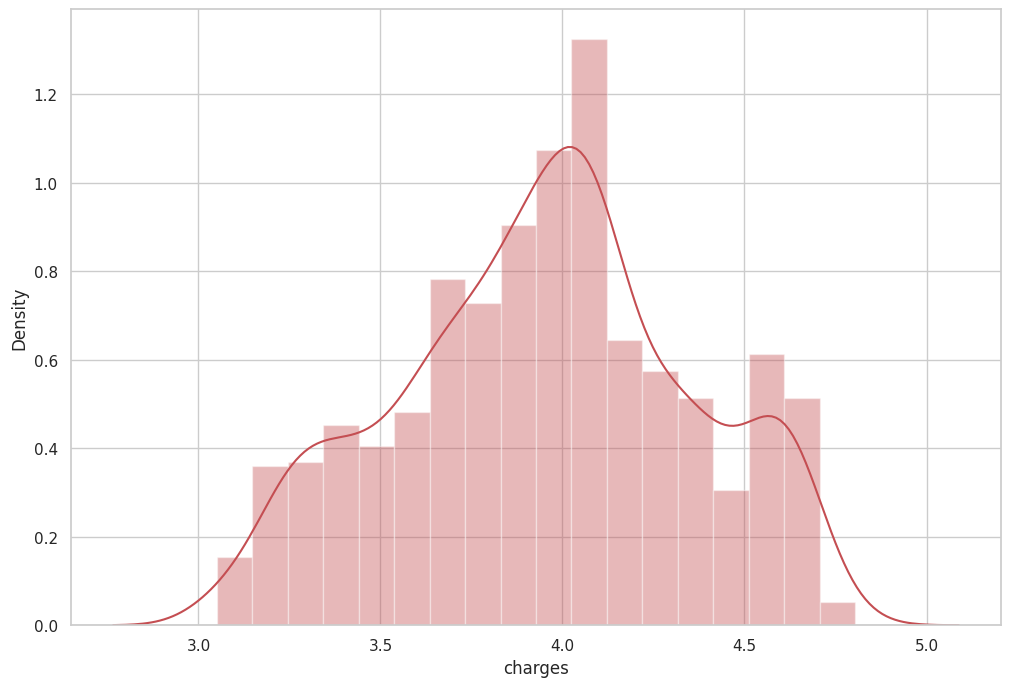

In [8]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

Ahora veamos los costos según la región.

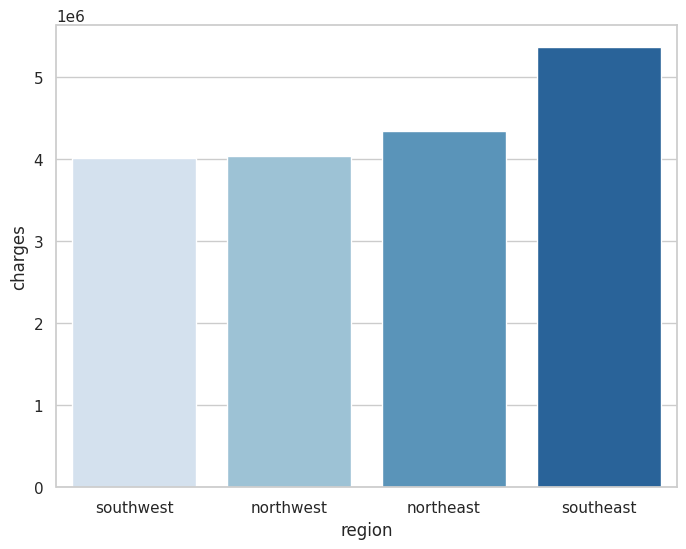

In [11]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)

# Crear la figura y el eje
f, ax = plt.subplots(1, 1, figsize=(8, 6))

# Corrección: primero los índices (categorías) y luego los valores
ax = sns.barplot(x=charges.head().index, y=charges.head(), palette='Blues')

# Mostrar el gráfico
plt.show()

En general, los cargos médicos más altos están en el sureste y los más bajos en el suroeste. Teniendo en cuenta ciertos factores (sexo, fumar, tener hijos), veamos cómo cambia por región.

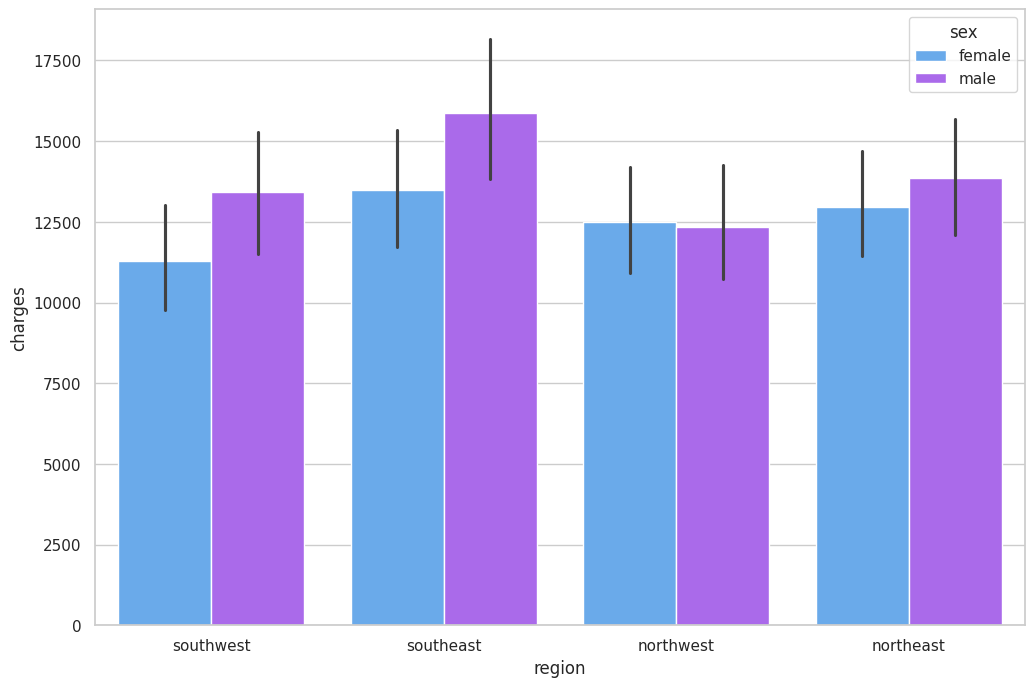

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

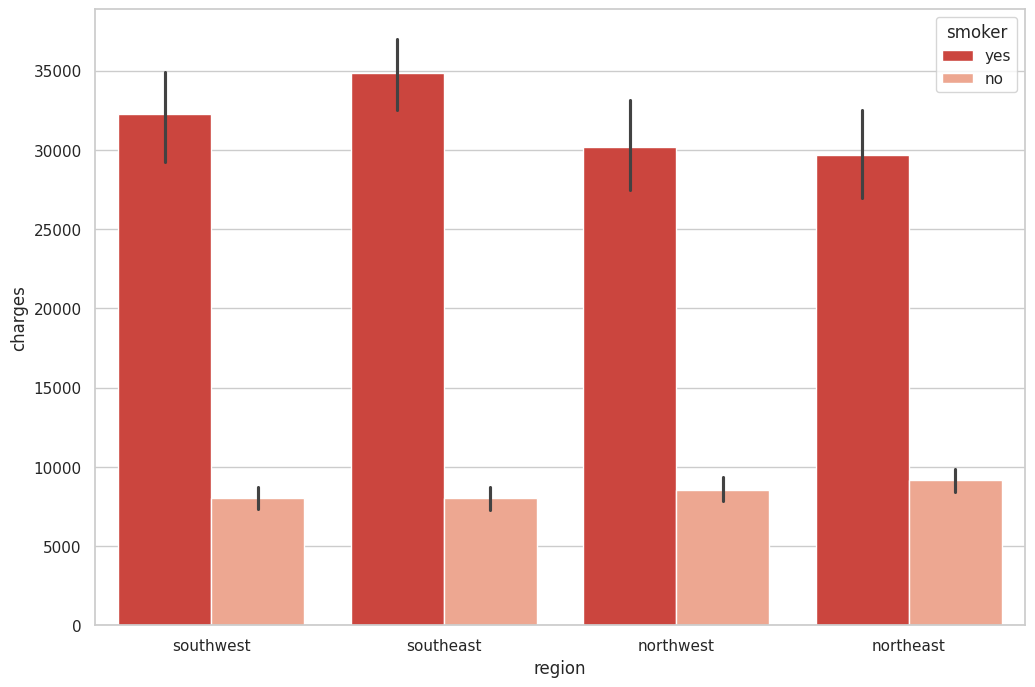

In [13]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

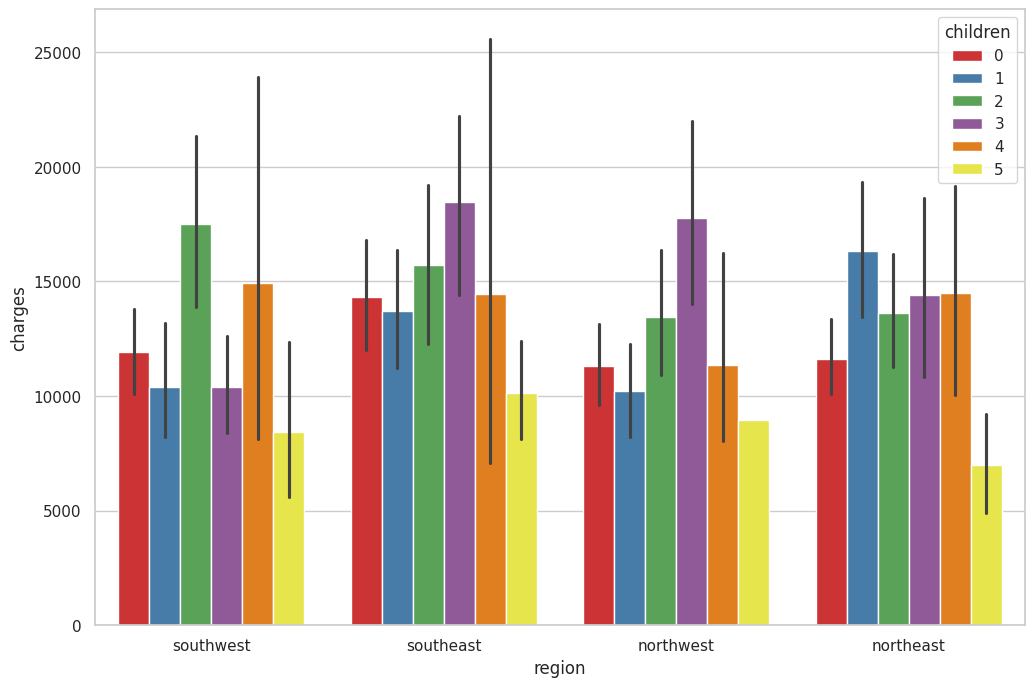

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

Como podemos ver en estos gráficos de barras, los cargos más altos debido al tabaquismo siguen estando en el Sureste, pero los más bajos están en el Noreste. Las personas en el Suroeste generalmente fuman más que las personas en el Noreste, pero las personas en el Noreste tienen cargos más altos por género en comparación con el Suroeste y el Noroeste en general. Además, las personas con hijos tienden a tener costos médicos más altos en general.

Ahora analicemos los cargos médicos por edad, IMC y niños según el factor de tabaquismo

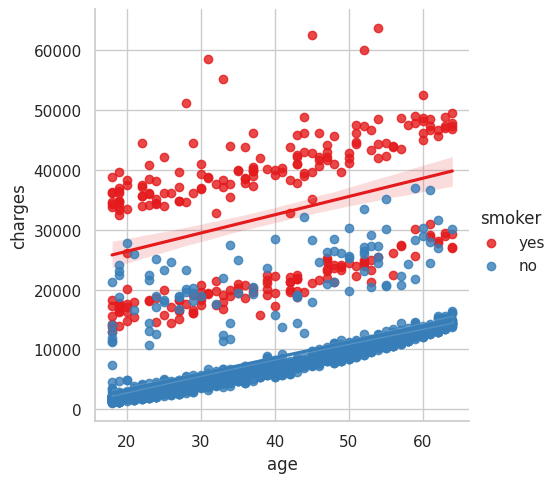

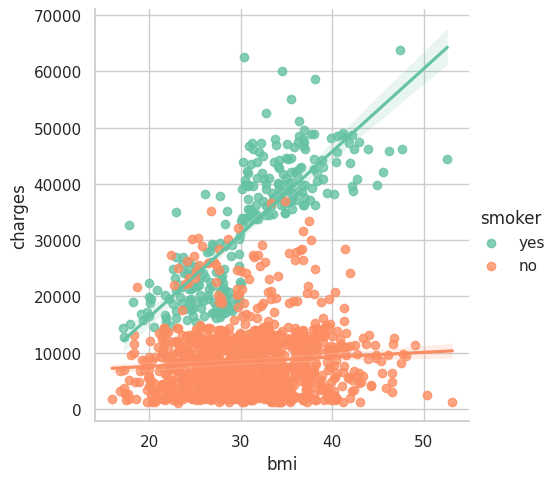

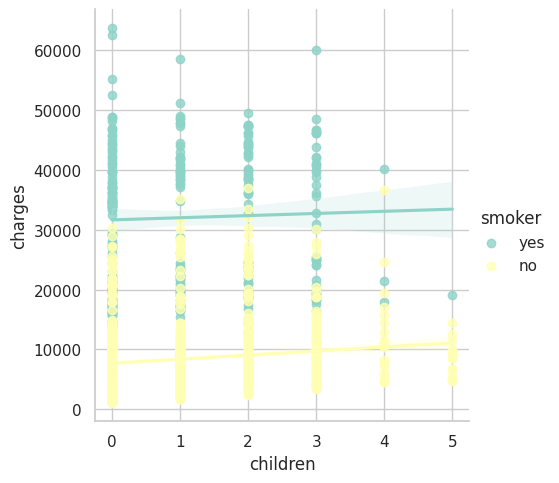

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

El tabaquismo tiene el mayor impacto en los costos médicos, aunque los costos aumentan con la edad, el IMC y la cantidad de hijos. Además, las personas que tienen hijos generalmente fuman menos, como muestran los siguientes gráficos de violín.

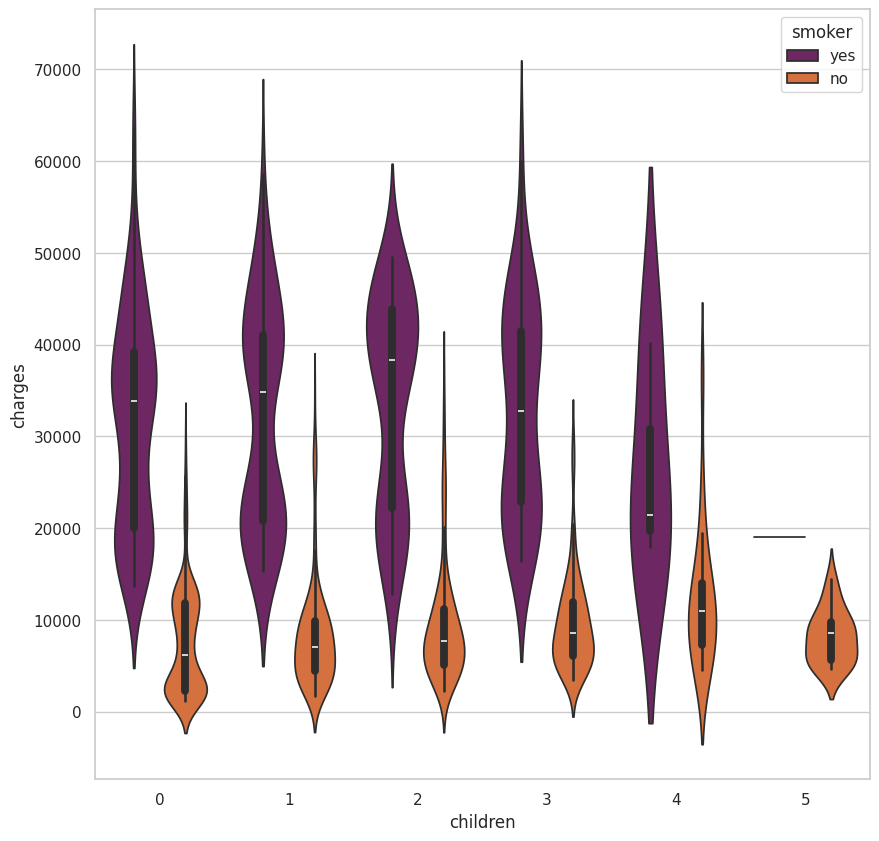

In [16]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [17]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [18]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


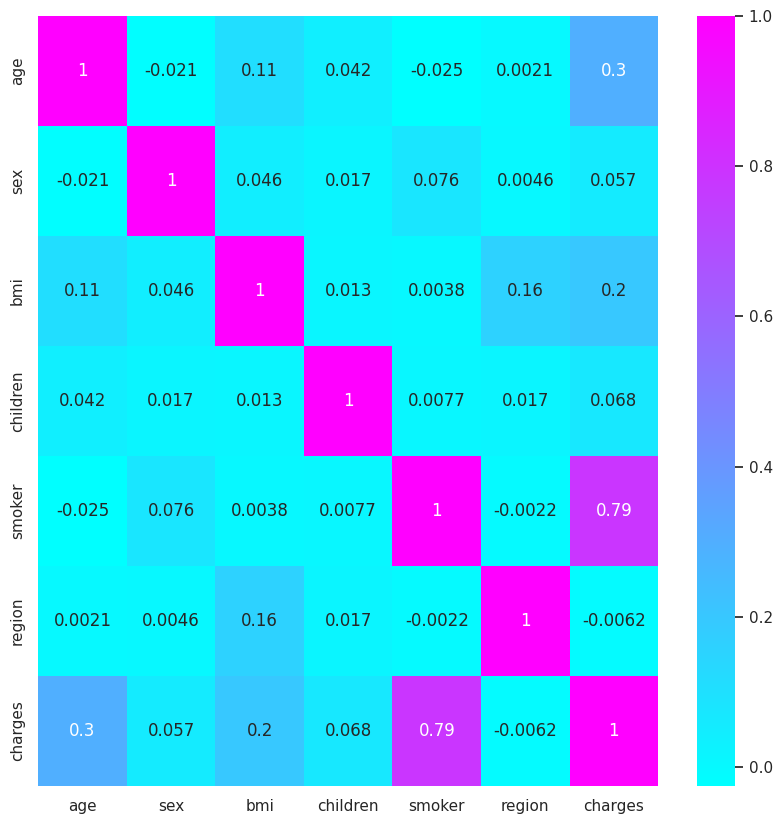

In [19]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

No hay correlación, excepto con el tabaquismo.

##Linear Regression

In [20]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
#Coeficiente de determinación
print(Lin_reg.score(x_test, y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


El resultado que obtuvimos es lo suficientemente bueno, pero podemos intentar mejorarlo un poco reduciendo características no importantes más adelante.

##Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495825
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


##Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11661.83892903954
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]
0.7998690236224706


##Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

# Dividir los datos
x = df.drop(['charges'], axis=1)
y = df['charges']

# Crear el modelo Random Forest
Rfr = rfr(n_estimators=100, criterion='squared_error', random_state=1, n_jobs=-1)

# Entrenar el modelo
Rfr.fit(x_train, y_train)

# Hacer predicciones
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

# Calcular el MSE y R2
print('MSE train data: %.3f, MSE test data: %.3f' %
      (metrics.mean_squared_error(y_train, x_train_pred),
       metrics.mean_squared_error(y_test, x_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' %
      (metrics.r2_score(y_train, x_train_pred),
       metrics.r2_score(y_test, x_test_pred)))

MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.975, R2 test data: 0.876


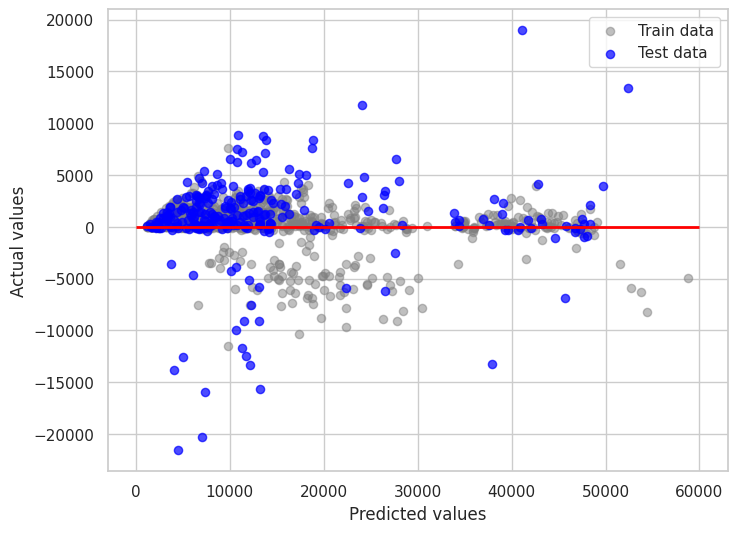

In [26]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

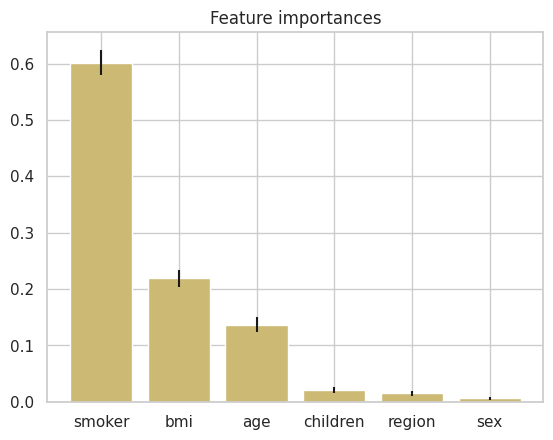

In [27]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

##Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252808
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345227


In [29]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776654
Mean Squared Error: 18895160.098780412
Root Mean Squared Error: 4346.856346692448


In [30]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


Conclusión: como notamos previamente, el tabaquismo es el factor que más afecta los cargos de los costos médicos, seguido del IMC y la edad. La regresión polinómica resultó ser el mejor modelo.